# **[Python for Data Science] Final Project: Predict Next Day Rain in Australia**
# **Hacktiv8**

## Aziz Fatih Fauzi


***

# 1. Introduction


#### **Latar Belakang**
Menurut KBBI pengertian cuaca adalah keadaan udara seperti temperatur, cahaya matahari, kelembapan, kecepatan angin, pada suatu tempat tertentu dengan jangka waktu terbatas. Cuaca juga dapat diartikan sebagai keadaan harian udara suatu wilayah yang tidak luas pada saat tertentu. Kondisi cuaca ini bisa berubah sewaktu-waktu. Keadaan cuaca ini selalu diamati.

Adapun salah satu fenomena penting bagi kehidupan yang dipengaruhi oleh cuaca adalah hujan. Berdasarkan permasalahan itu, maka perlu dilakukan sebuah analisis dengan suatu model yang dapat digunakan untuk memprediksi terjadinya hujan agar manusia dapat menjalankan aktivitas dengan lebih baik.

#### **Dataset**
Dataset yang digunakan pada project ini yaitu Rain in Australia yang tersedia dari website kaggle melalui [link berikut](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package)

Dataset ini  berisi sekitar 10 tahun pengamatan cuaca harian dari banyak lokasi di seluruh Australia. Dataset ini terdiri dari 23 atribut dan 145460 baris. Atribut yang menjadi variabel target adalah RainTomorrow yang berisi "No" (tidak terjadi hujan besok) dan "Yes" (terjadi hujan besok 1mm atau lebih).

### **Informasi tentang Fitur-Fitur di Dataset**
1. Date - tanggal hari itu
2. Location - lokasi, nama kota di Australia
3. MinTemp - temperatur terendah hari itu dalam celcius
4. MaxTemp - temperatur tertinggi hari itu dalam celcius
5. Rainfall - jumlah curah hujan hari itu dalam mm
6. Evaporation - jumlah evaporasi dalam mm dari Class A pan selama 24 jam
sebelum jam 9 pagi hari itu
7. Sunshine - jumlah jam hari itu cerah dengan cahaya matahari
8. WindGustDir - arah kecepatan angin yang paling tinggi selama 24 jam sebelum
jam 12 malam hari itu
9. WindGustSpeed - kecepatan angin yang paling tinggi dalam km/jam selama 24
jam sebelum jam 12 malam hari itu
10. WindDir9am - arah angin jam 9 pagi
11. WindDir3pm - arah angin jam 3 sore
12. WindSpeed9am - kecepatan angin jam 9 pagi dalam km/jam dihitung dari
rata-rata kecepatan angin 10 menit sebelum jam 9 pagi
13. WindSpeed3pm - kecepatan angin jam 3 sore dalam km/jam dihitung dari
rata-rata kecepatan angin 10 menit sebelum jam 3 sore
14. Humidity9am - humiditas jam 9 pagi dalam persen
15. Humidity3pm - humiditas jam 3 sore dalam persen
16. Pressure9am - tekanan udara jam 9 pagi dalam hpa
17. Pressure3pm - tekanan udara jam 3 sore dalam hpa
18. Cloud9am - persentase langit yang tertutup awan jam 9 pagi. dihitung dalam
oktas, unit ⅛, menghitung berapa unit ⅛ dari langit yang tertutup awan. Jika 0,
langit cerah, jika 8, langit sepenuhnya tertutup awan.
19. Cloud3pm - persentase langit yang tertutup awan jam 3 sore
20. Temp9am - temperatur jam 9 pagi dalam celcius
21. Temp3pm - temperatur jam 3 sore dalam celcius
22. RainToday - apakah hari ini hujan: jika curah hujan 24 jam sebelum jam 9 pagi
melebihi 1mm, maka nilai ini adalah 1, jika tidak nilai nya 0
23. RainTomorrow - variable yang mau di prediksi

# 2. Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from collections import Counter
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import f_regression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest

from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import pickle

# 3. Data Loading 

In [3]:
# Loading data with pandas
df = pd.read_csv('weatherAUS.csv')

In [4]:
# Setting for see all the columns
pd.set_option("display.max_columns", None)

In [5]:
# Melihat dimensi dataset
df.shape

(145460, 23)

In [6]:
# Melihat 5 baris teratas dataset
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [7]:
# Melihat 5 baris terbawah dataset
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,ESE,17.0,17.0,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [8]:
# Menampilkan informasi pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [9]:
# Menampilkan daftar kolom (atribut)
atribut = df.columns.values
print(atribut)

['Date' 'Location' 'MinTemp' 'MaxTemp' 'Rainfall' 'Evaporation' 'Sunshine'
 'WindGustDir' 'WindGustSpeed' 'WindDir9am' 'WindDir3pm' 'WindSpeed9am'
 'WindSpeed3pm' 'Humidity9am' 'Humidity3pm' 'Pressure9am' 'Pressure3pm'
 'Cloud9am' 'Cloud3pm' 'Temp9am' 'Temp3pm' 'RainToday' 'RainTomorrow']


In [10]:
# Variabel bertipe kategorik
categorical = [i for i in df.columns if df[i].dtypes == 'O']

# Variabel bertipe numerik
numerical = [i for i in df.columns if i not in categorical]
print('Categorical:', categorical, '\n\n', 'Numerical: ', numerical)

Categorical: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'] 

 Numerical:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


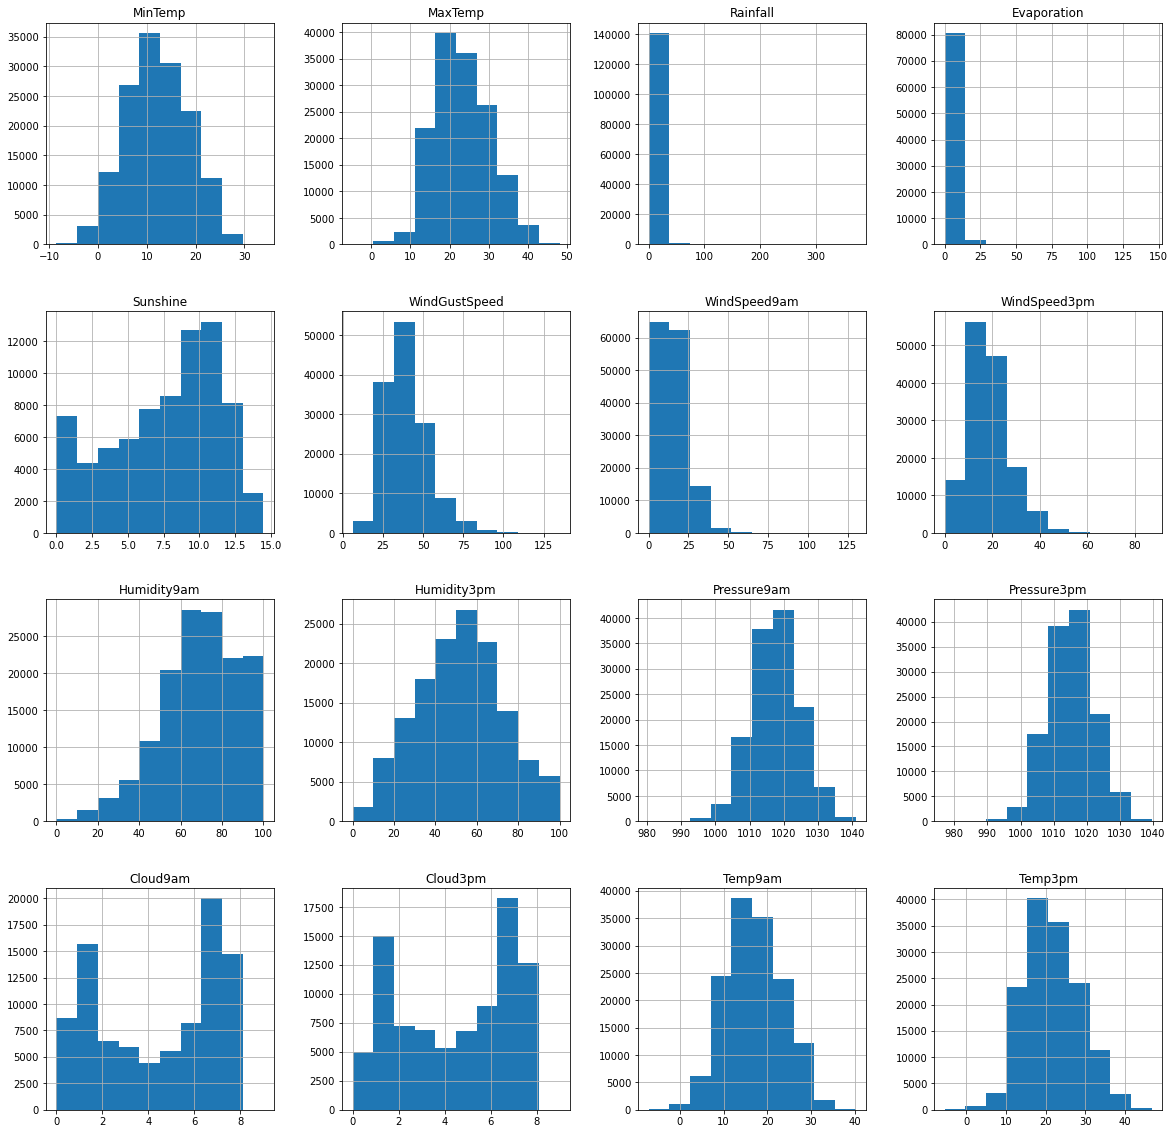

In [11]:
# Melihat distribusi pada atribut numerik
df[numerical].hist(bins=10, figsize = (20,20))
plt.show()

- Berdasarkan histogram terlihat bahwa beberapa atribut berdistribusi normal, seperti Humidity3pm, MinTemp, Temp9am, sedangkan beberapa atribut memiliki skewness yang tinggi, yaitu atribut Evaporation dan Rainfall.

In [12]:
# Melihat statistik deskriptif dari data yang bertipe numerik
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [13]:
# Melihat statistik deskriptif dari masing-masing atribut yang bertipe object
df.describe(include='O').T

,count,unique,top,freq
Date,145460,3436,2013-11-12,49
Location,145460,49,Canberra,3436
WindGustDir,135134,16,W,9915
WindDir9am,134894,16,N,11758
WindDir3pm,141232,16,SE,10838
RainToday,142199,2,No,110319
RainTomorrow,142193,2,No,110316


In [14]:
# Cek apakah ada missing value pada dataset
df.isnull().values.any()

True

In [15]:
# Melihat banyaknya unique values pada masing-masing atribut
for col in df.columns :
    print(col, ':', df[col].nunique())

Date : 3436
Location : 49
MinTemp : 389
MaxTemp : 505
Rainfall : 681
Evaporation : 358
Sunshine : 145
WindGustDir : 16
WindGustSpeed : 67
WindDir9am : 16
WindDir3pm : 16
WindSpeed9am : 43
WindSpeed3pm : 44
Humidity9am : 101
Humidity3pm : 101
Pressure9am : 546
Pressure3pm : 549
Cloud9am : 10
Cloud3pm : 10
Temp9am : 441
Temp3pm : 502
RainToday : 2
RainTomorrow : 2


In [16]:
# Menampilkan unique values pada kolom Location
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [17]:
# Menampilkan unique values pada kolom Date
df['Date'].unique()

array(['2008-12-01', '2008-12-02', '2008-12-03', ..., '2008-01-29',
       '2008-01-30', '2008-01-31'], dtype=object)

# 4. Data Cleaning

Bagian ini berisi proses penyiapan data berupa data cleaning sebelum
dilakukan explorasi data lebih lanjut. Proses cleaning dapat berupa
memberi nama baru untuk setiap kolom, mengisi missing values,
menghapus kolom yang tidak dipakai, dan lain sebagainya.

##### Cek Data Duplikat


In [18]:
df.duplicated().sum()

0

* Tidak ada data duplikat

##### Cek Missing Value

In [19]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

##### Menampilkan berapa persen missing value pada tiap kolom

In [20]:
miss_value = df.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %')
miss_value

Date               0.0 %
Location           0.0 %
MinTemp           1.02 %
MaxTemp           0.87 %
Rainfall          2.24 %
Evaporation      43.17 %
Sunshine         48.01 %
WindGustDir        7.1 %
WindGustSpeed     7.06 %
WindDir9am        7.26 %
WindDir3pm        2.91 %
WindSpeed9am      1.21 %
WindSpeed3pm      2.11 %
Humidity9am       1.82 %
Humidity3pm        3.1 %
Pressure9am      10.36 %
Pressure3pm      10.33 %
Cloud9am         38.42 %
Cloud3pm         40.81 %
Temp9am           1.21 %
Temp3pm           2.48 %
RainToday         2.24 %
RainTomorrow      2.25 %
dtype: object

##### Menampilkan visualisasi data yang terdapat missing value

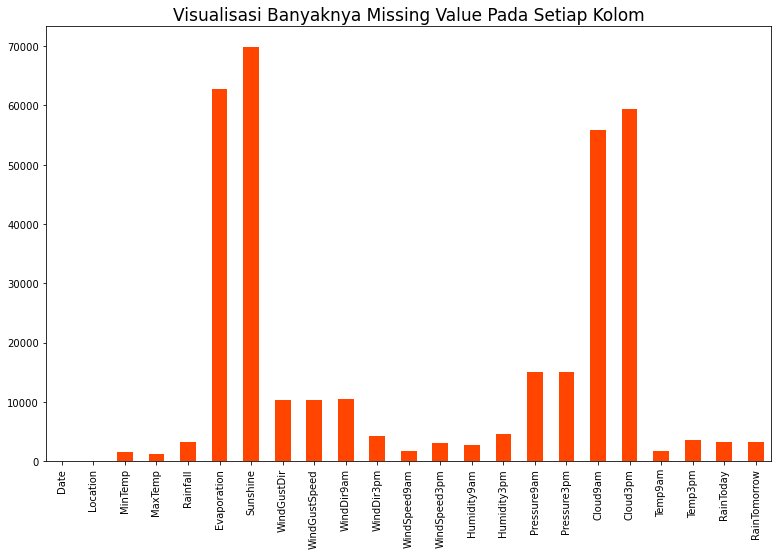

In [21]:
df.isnull().sum().plot.bar(figsize = (13,8), color="orangered")
plt.title("Visualisasi Banyaknya Missing Value Pada Setiap Kolom", fontsize=17)
plt.show()

##### **Imputing missing values dalam fitur kategorik menggunakan modus**
Metode imputasi dengan modus umumnya digunakan untuk mengisi nilai yang hilang pada variabel categorical yang memiliki distribusi frekuensi yang tidak merata. Hal ini karena dengan menggunakan modus, kita dapat mempertahankan distribusi frekuensi yang ada dan menghindari pergeseran nilai tengah yang mungkin terjadi jika kita menggunakan metode imputasi lain, seperti mean atau median.

In [22]:
categorical_features_with_null = [feature for feature in categorical if df[feature].isnull().sum()]
for each_feature in categorical_features_with_null:
    mode_val = df[each_feature].mode()[0]
    df[each_feature].fillna(mode_val,inplace=True)

##### **Menangani missing values dalam fitur numerik**

In [23]:
numerical_features = [column_name for column_name in df.columns if df[column_name].dtype != 'O']
df[numerical_features].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
dtype: int64

- Missing values dalam fitur numerik dapat di-impute menggunakan Mean atau Median. Mean sangat sensitif dengan outliers, sehingga missing values pada data numerik diisi dengan median yang lebih kebal dengan outliers. Sebelum itu, outlier dalam fitur numerik perlu ditangani dengan benar.

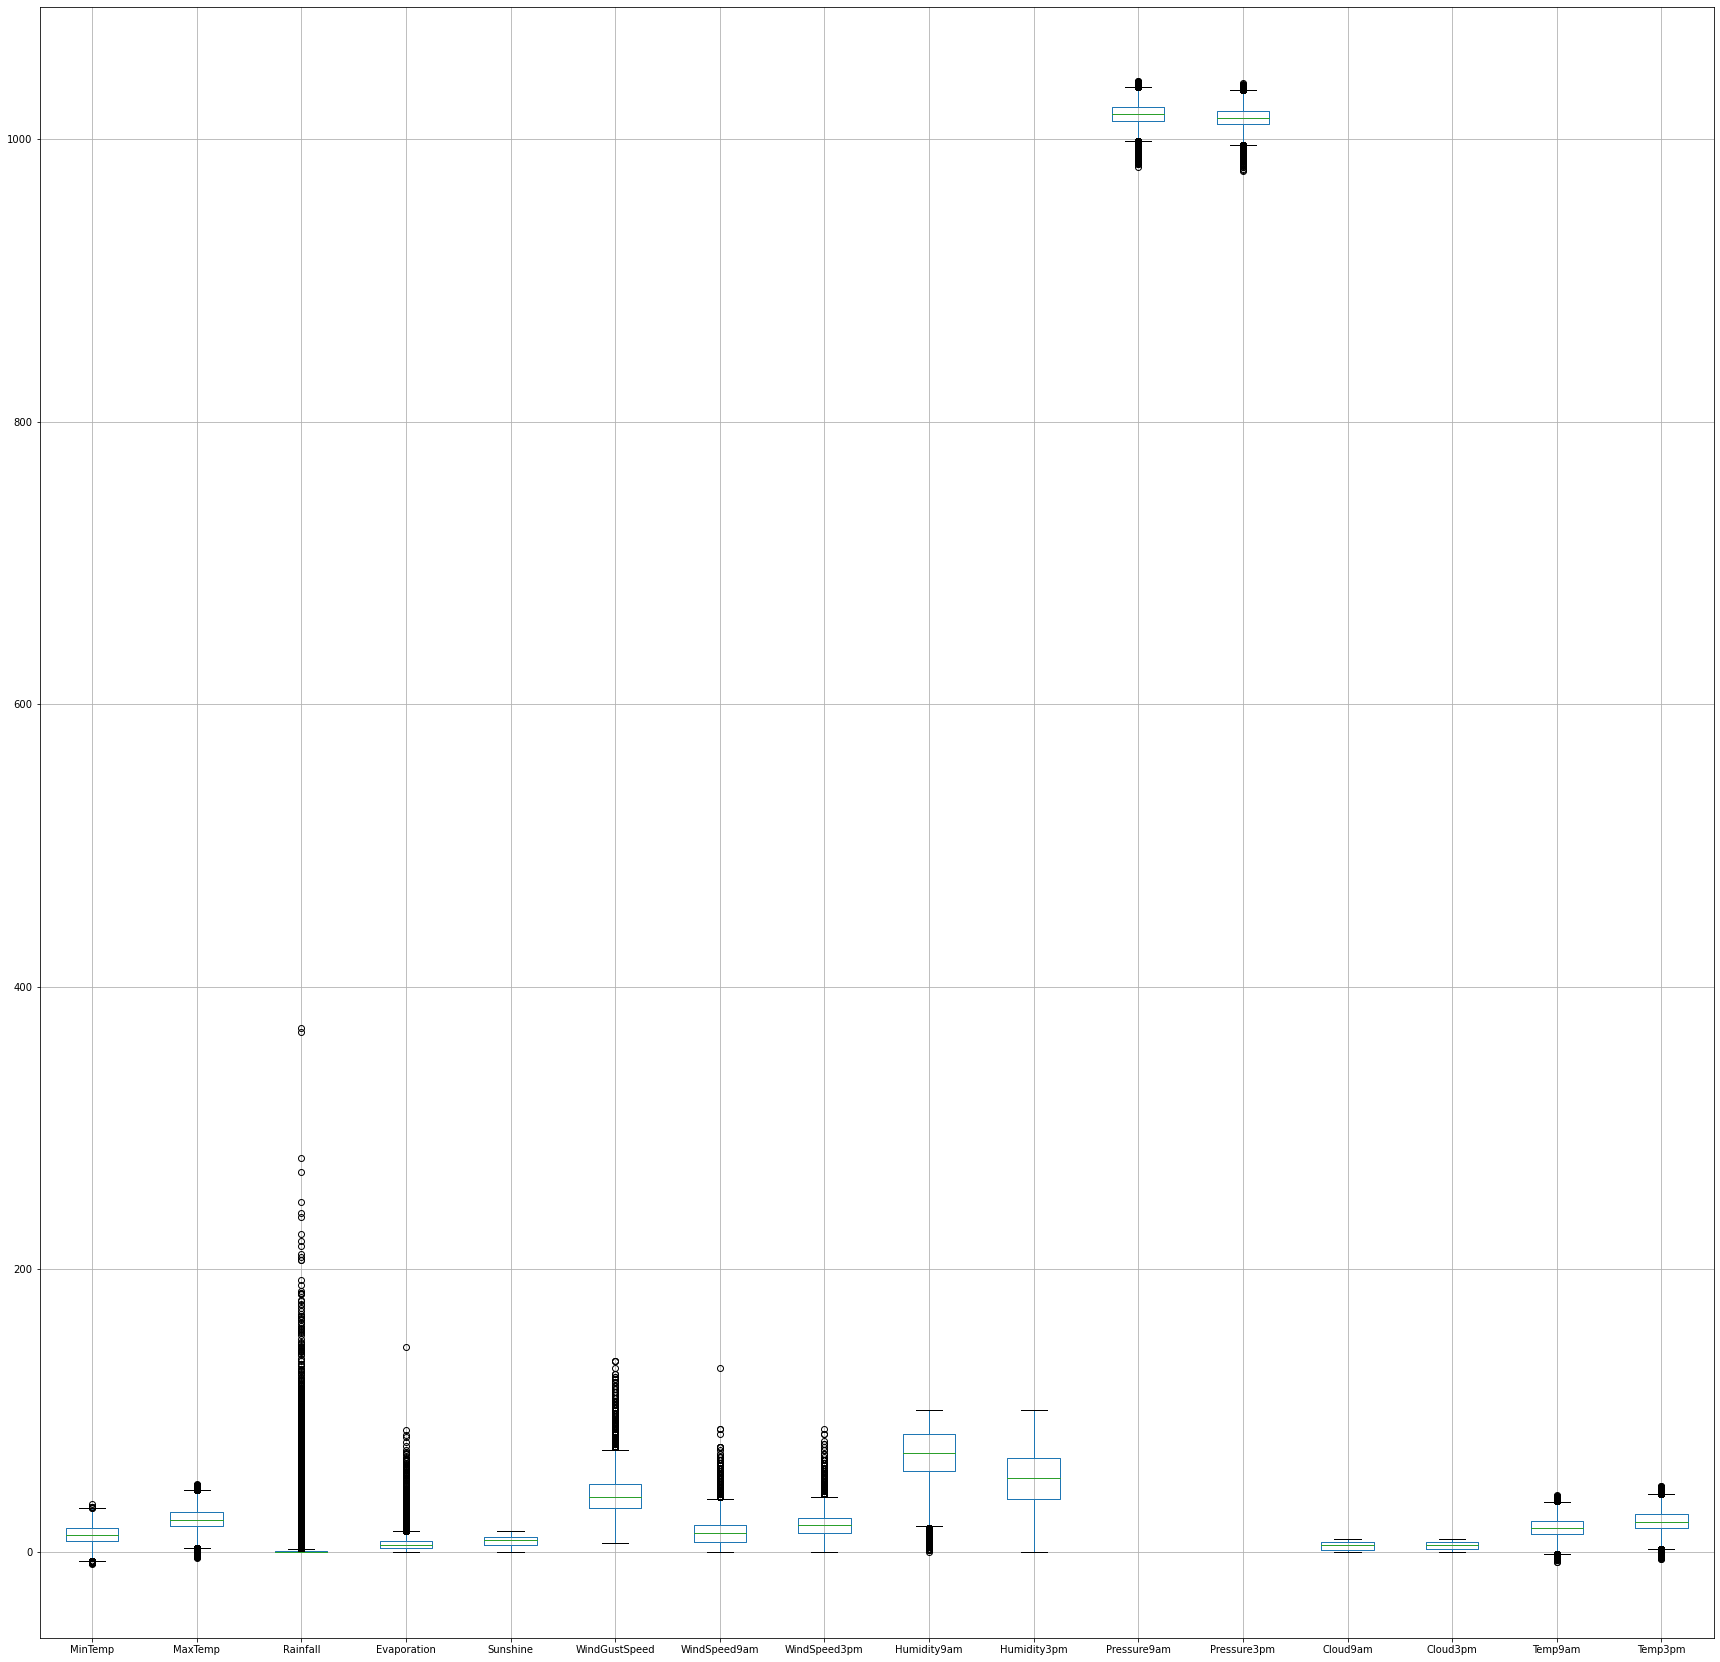

In [24]:
df[numerical].boxplot(figsize=(30,30))
plt.show()

- Boxplot menunjukkan outlier dalam jumlah banyak pada atribut MinTemp, MaxTemp, Rainfall, Evaporation, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity9am, Pressure9am, Pressure3pm, Temp9am, dan Temp3pm.

##### Outlier Treatment untuk menghilangkan outlier dari fitur numerik

=> Mengganti nilai outliers menggunakan nilai lower bound dan upper bound.

Nilai lower bound bisa didapatkan menggunakan rumus

Lb=Q1 -(IQR 1.5)

Sementara itu, nilai upper bound bisa didapatkan menggunakan rumus

Ub=Q3+(IQR 1.5)

Dengan IQR = Q3 - Q1.

In [25]:
features_with_outliers = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
for feature in features_with_outliers:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df.loc[df[feature]<lower_limit,feature] = lower_limit
    df.loc[df[feature]>upper_limit,feature] = upper_limit

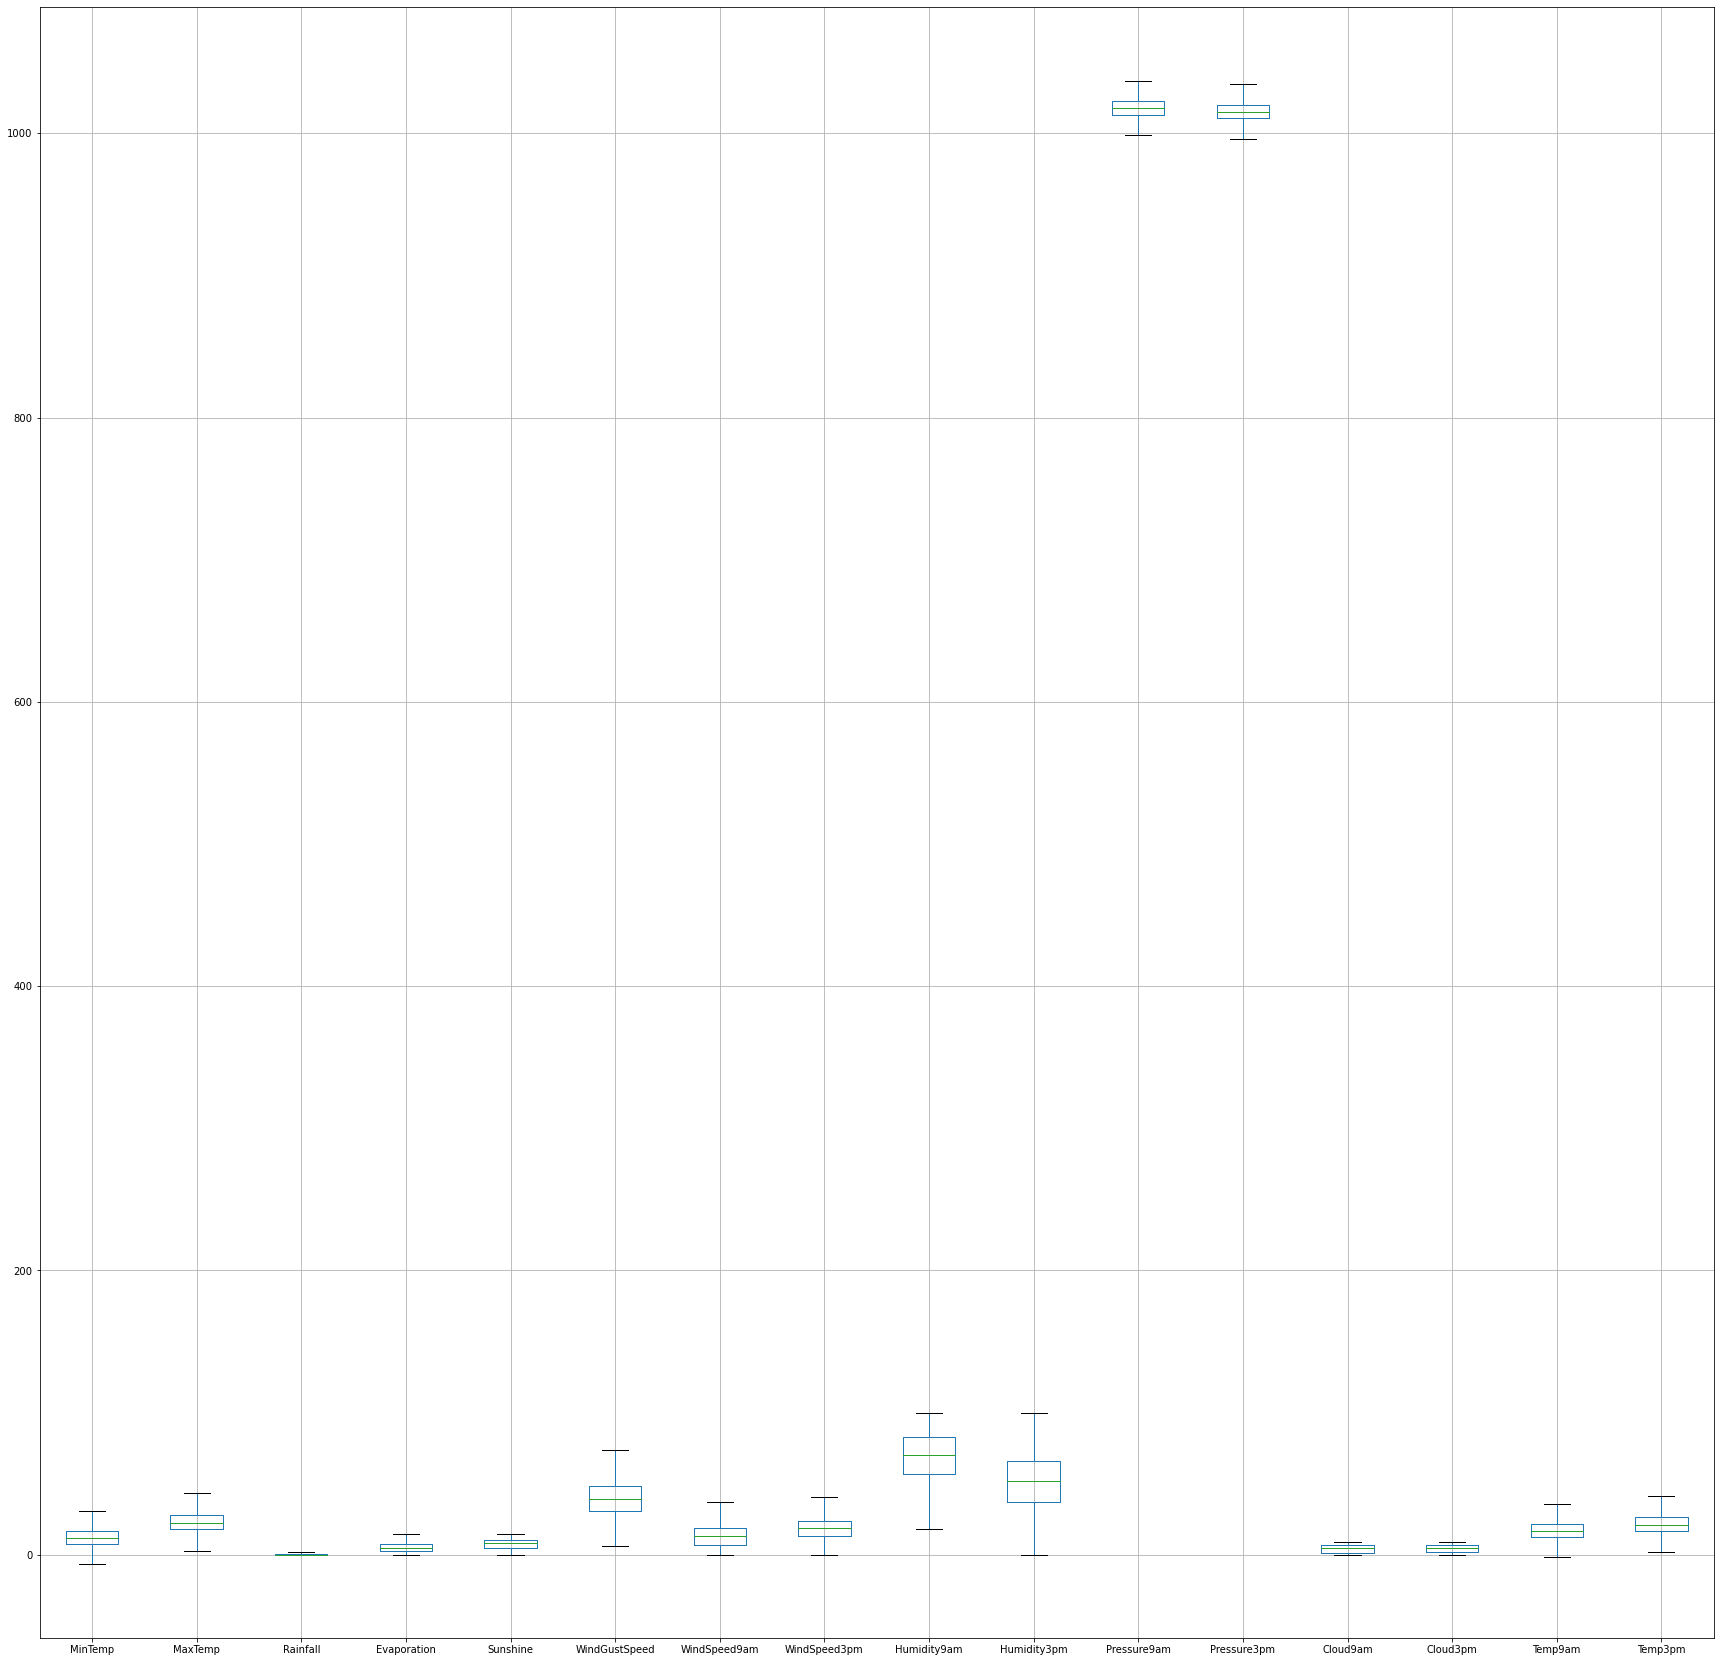

In [26]:
df[numerical].boxplot(figsize=(30,30))
plt.show()

Sekarang, fitur numerik sudah bebas dari outliers. Saatnya mengisi missing value yang ada di fitur numerik dengan median

In [27]:
numerical_features_with_null = [feature for feature in numerical if df[feature].isnull().sum()]
for feature in numerical_features_with_null:
    median_value = df[feature].median()
    df[feature].fillna(median_value,inplace=True)

In [28]:
df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

##### **Cek kardinalitas untuk kolom Kategorik :**
- Banyak algoritma Machine Leaening seperti Linear Regression, Logistic Regression, k-nearest neighbors, dsb. Hanya dapat menangani data numerik, sehingga encoding data kategorik menjadi numerik menjadi langkah yang diperlukan. Namun sebelum beralih ke encoding, periksa kardinalitas setiap fitur kategorik.
- Kardinalitas adalah Jumlah nilai unik di setiap fitur kategori dikenal sebagai kardinalitas.
- Fitur kardinalitas tinggi ini menimbulkan banyak masalah serius seperti akan meningkatkan jumlah dimensi data ketika fitur tersebut dikodekan. Ini tidak baik untuk model.
- Ada banyak cara untuk menangani kardinalitas tinggi, salah satunya adalah feature engineering dan yang lainnya hanya dropping fitur tersebut jika tidak menambah value apa pun pada model.

In [29]:
for each_feature in categorical:
   unique_values = len(df[each_feature].unique())
   print("Cardinality(no. of unique values) of {} are: {}".format(each_feature, unique_values))

Cardinality(no. of unique values) of Date are: 3436
Cardinality(no. of unique values) of Location are: 49
Cardinality(no. of unique values) of WindGustDir are: 16
Cardinality(no. of unique values) of WindDir9am are: 16
Cardinality(no. of unique values) of WindDir3pm are: 16
Cardinality(no. of unique values) of RainToday are: 2
Cardinality(no. of unique values) of RainTomorrow are: 2


- Kolom Date memiliki kardinalitas tinggi yang menimbulkan beberapa masalah pada model dalam hal efisiensi dan juga dimensi data meningkat ketika di-encoding ke data numerik.

##### Feature Engineering pada kolom Date untuk mengurangi Kardinalitas Tinggi

Bagi Column Date menjadi 3 bagian (kolom baru) yaitu year, month, day

In [30]:
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [31]:
# Drop kolom Date column
df.drop('Date', axis = 1, inplace = True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


##### Analisis Bivariate

1. Sunshine vs Rainfall

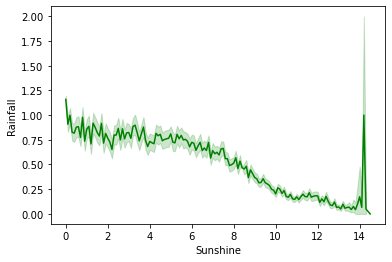

In [32]:
sns.lineplot(data=df,x='Sunshine',y='Rainfall',color='green');

- Pada plot garis di atas, atribut Sunshine berbanding terbalik dengan atribut Rainfall.

2. Sunshine vs Evaporation

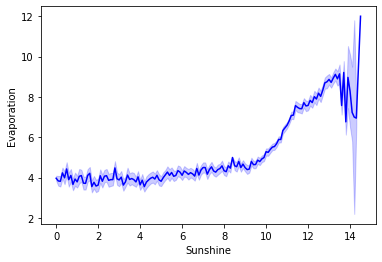

In [33]:
sns.lineplot(data=df,x='Sunshine',y='Evaporation',color='blue');

- Pada plot garis di atas, atribut Sunshine berbanding lurus dengan atribut Evaporation.

##### Membuat kolom atau atribut baru
disini kami membuat atribut atau kolom baru yaitu **TempDifference** yaitu selisih temperature, yang didapatkan dengan menghitung **MaxTemperature** dikurang dengan **MinTemperature**

In [34]:
df['TempDifference'] = df['MaxTemp'] - df['MinTemp']

# Melihat data setelah ditambahkan atribut / kolom baru
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day,TempDifference
0,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,No,2008,12,1,9.5
1,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,No,2008,12,2,17.7
2,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,No,2008,12,3,12.8
3,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,No,2008,12,4,18.8
4,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5,14.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.4,0.0,4.8,8.4,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4,No,No,2017,6,21,20.6
145456,Uluru,3.6,25.3,0.0,4.8,8.4,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5,No,No,2017,6,22,21.7
145457,Uluru,5.4,26.9,0.0,4.8,8.4,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1,No,No,2017,6,23,21.5
145458,Uluru,7.8,27.0,0.0,4.8,8.4,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No,2017,6,24,19.2


##### Melakukan rename kolom dari dataset

In [35]:
df = df.rename(columns={'WindGustSpeed':'WindSpeed'})

df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day,TempDifference
0,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,No,2008,12,1,9.5
1,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,No,2008,12,2,17.7
2,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,No,2008,12,3,12.8
3,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,No,2008,12,4,18.8
4,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5,14.8


##### Melihat banyaknya nilai dari setiap atribut

In [36]:
for col in df.columns:
    print(col, ': ')
    print(df[col].value_counts())
    print('='*70)

Location : 
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown  

#### ANALISIS:

Dari hasil pengecekan, dapat diketahui bahwa nilai missing value terdapat pada beberapa kolom dengan jumlah yang berbeda - beda. Pada visualisasi banyaknya missing value dapat dilihat pada kolom *Evaporation, Sunshine, Cloud9am dan Cloud3am* memiliki data yang paling banyak missing value. Kami mengisi missing value dengan median untuk data yang bertipe numerical dan pada kolom categorical ditangani dengan modus. Dan pada bagian ini, kami membuat kolom atau atribut baru yaitu `TempDifference` atau selisih temperature, yang didapatkan dengan menghitung `MaxTemperature` dikurang dengan `MinTemperature`.

# 5. Exploratory Data Analysis

Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan
query, grouping, visualisasi sederhana, dan lain sebagainya.

##### Melihat proporsi data pada kolom Location dan RainToday dengan menggunakan crosstab

In [37]:
pd.crosstab(df.RainToday, df.Location)

Location,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,MountGinini,Newcastle,Nhil,NorahHead,NorfolkIsland,Nuriootpa,PearceRAAF,Penrith,Perth,PerthAirport,Portland,Richmond,Sale,SalmonGums,Sydney,SydneyAirport,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
RainToday,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
No,2504,2138,2423,2796,2426,2259,2478,2484,2090,2807,2623,2140,2088,2341,2265,2431,1313,2340,2557,2356,2682,2615,2119,2221,2308,1336,2196,2090,2417,2504,2444,2548,2442,1915,2449,2366,2529,2478,2235,2520,2471,1462,2473,2057,2271,2309,2130,2327,2807
Yes,689,902,617,244,583,781,562,709,950,629,386,869,921,852,775,762,265,700,636,653,327,394,921,819,731,242,808,919,592,505,595,645,567,1094,560,643,472,866,774,520,568,116,536,949,738,700,879,713,202


**Kesimpulan :** Dari hasil diatas maka dapat diketahui bahwa seluruh lokasi lebih sering tidak mengalami hujan di tiap harinya. Adapun lokasi Uluru jarang terjadi hujan, sedangkan di lokasi Portland memiliki perbedaan yang cukup tipis antara hujan dan tidak pada setiap harinya.

##### Melihat Curah hujan tertinggi dan terendah untuk lokasi Canberra

In [38]:
df.loc[df['Location'] == 'Canberra', 'Rainfall'].agg(('min', 'max'))

min    0.0
max    2.0
Name: Rainfall, dtype: float64

**Kesimpulan :** Dari hasil diatas maka dapat diketahui bahwa pada lokasi Canberra (ibu kota Australia) curah hujan terendah yaitu 0.0 dan curah hujan tertinggi yaitu 2.0

##### Melihat perbedaan Tekanan pada jam 9 pagi dan Tekanan pada jam 3 sore terhadap Hujan hari esok

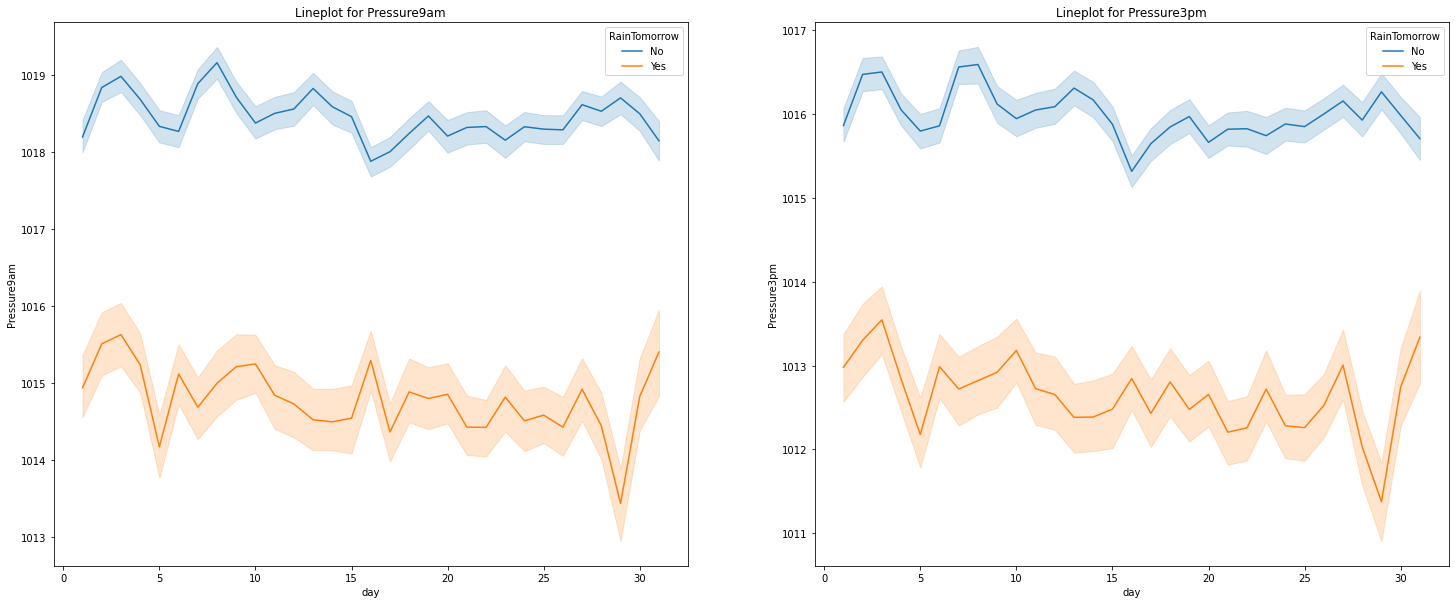

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(25, 10))

# Pressure9am
sns.lineplot(ax=axes[0],x="day",y="Pressure9am",hue="RainTomorrow",data=df)
axes[0].set_title('Lineplot for Pressure9am')
# Pressure3pm
sns.lineplot(ax=axes[1],x="day",y="Pressure3pm",hue="RainTomorrow",data=df)
axes[1].set_title('Lineplot for Pressure3pm')
plt.show()

- Jika perbedaan tekanan antara jam 9 pagi dan jam 3 sore rendah maka kemungkinan akan terjadi hujan besok lebih besar.

##### Melihat nilai tertinggi dan terendah pada kecepatan angin (WindSpeed)

In [40]:
df.max(axis=0)['WindSpeed']

73.5

In [41]:
df.min(axis=0)['WindSpeed']

6.0

**Kesimpulan :** Dari hasil diatas maka dapat diketahui bahwa kecepatan angin tertinggi yaitu senilai 73.5km/jam. Sedangkan untuk kecepatan angin terendah didapat dengan nilai 6km/jam.

##### Mengidentifikasi rata-rata hari hujan selama 24 jam (berdasarkan rainfall) dengan melakukan grouping berdasarkan lokasi.

In [42]:
df_mean = df[['Location','Rainfall']].groupby('Location').mean().sort_values(by='Rainfall', ascending=False)
df_mean

,Rainfall
Location,
Portland,0.794616
NorfolkIsland,0.677833
Walpole,0.673653
Dartmoor,0.672250
Cairns,0.669243
MountGambier,0.666382
Albany,0.638487
Witchcliffe,0.635161
CoffsHarbour,0.609638


**Kesimpulan :** Dari hasil dapat dilihat bahwa untuk rata-rata waktu terlama hujan dalam 24 jam adalah pada daerah Portland dengan rata-rata 0.796721 jam, dan waktu tercepat dengan rata-rata 0.153463 jam ada di daerah Woomera.

### Visualisasi Pie Chart dan Bar Chart untuk Persentase Setiap Label Kelas

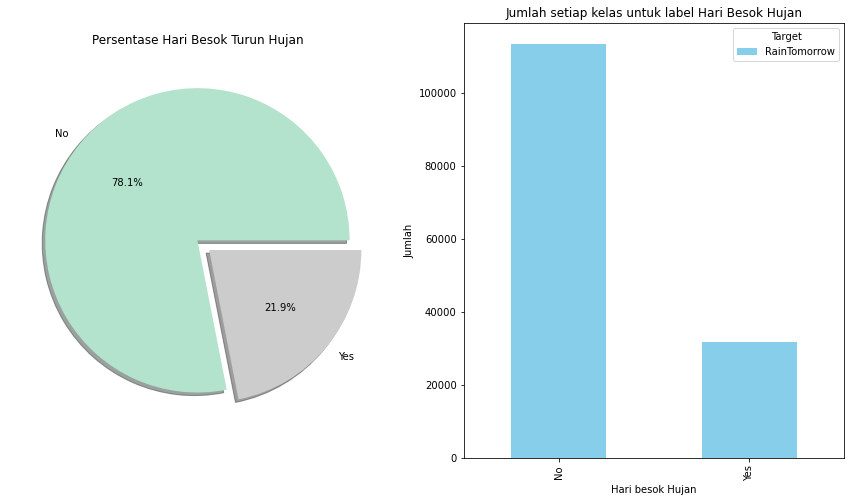

In [43]:
fig, ax = plt.subplots(1,2,figsize=(15,8))

# Pie Chart Persentase "Rain Tomorrow"
df['RainTomorrow'].value_counts().plot(
    kind='pie', 
    ax=ax[0], 
    autopct='%.1f%%',
    explode=[0,0.1],
    cmap='Pastel2',
    shadow=True
)
ax[0].set_title('Persentase Hari Besok Turun Hujan')
ax[0].set_ylabel('')

# Barchart besaran setiap nilai pada kelas target
df.groupby('RainTomorrow').agg({'RainTomorrow':'count'}).plot(
    kind='bar',
    ax=ax[1], 
    color='skyblue'
)
ax[1].set_title('Jumlah setiap kelas untuk label Hari Besok Hujan')
ax[1].set_ylabel('Jumlah')
ax[1].set_xlabel('Hari besok Hujan')
ax[1].legend(title='Target')

**Kesimpulan :** Dari hasil visualisasi pie chart dan histogram diatas maka dapat dilihat bahwa Persentase 'RainTomorrow' untuk label "Yes" sebesar **21,9%** dan label "No" sebesar **78,1%**. Hal ini berarti terdapat ketidakseimbangan label pada sampel dataset, dimana label "No" 3x lebih banyak dibandingkan label "Yes".

### Visualisasi Bar Chart Persentase Rain Tomorrow = Yes Berdasarkan Lokasi

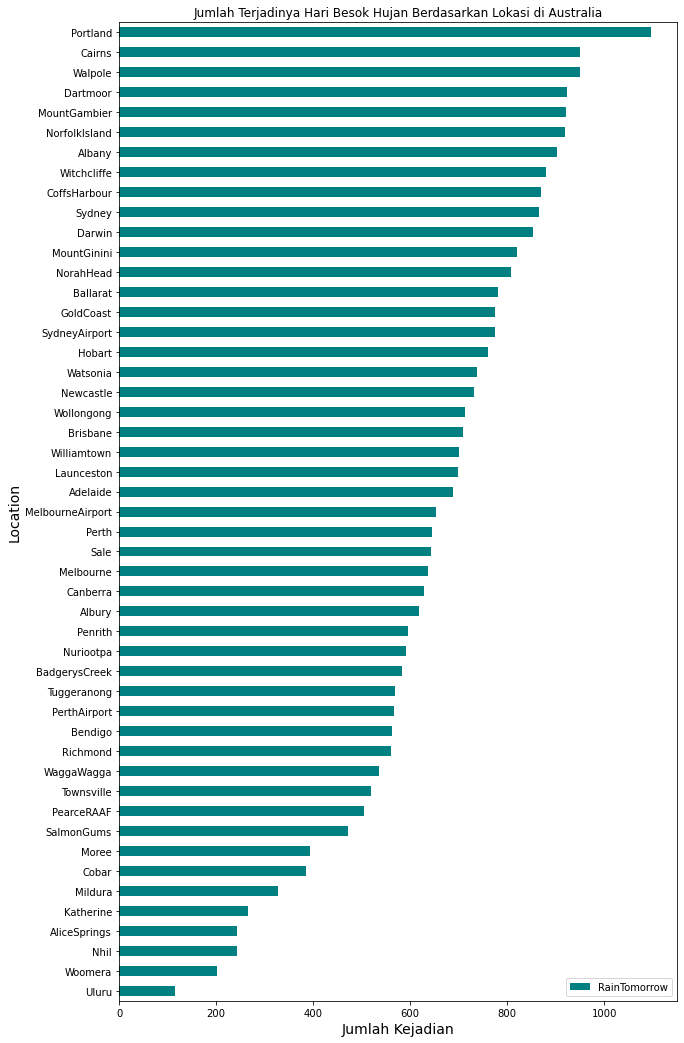

In [44]:
# Kelompokkan data berdasarkan location untuk label 'Yes'
loc_no = df[
    (df['RainTomorrow']=="Yes")
].groupby('Location').agg({'RainTomorrow':'count'}).sort_values(by='RainTomorrow')
loc_no.plot(kind='barh', figsize=(10,18), color=['Teal'])

plt.ylabel("Location", fontsize=14)
plt.xlabel("Jumlah Kejadian", fontsize=14)
plt.title("Jumlah Terjadinya Hari Besok Hujan Berdasarkan Lokasi di Australia")
plt.legend()
plt.show()

**Kesimpulan :** Dari hasil diagram bar chart diatas maka dapat dilihat bahwa untuk location **Portland, Cairns, Walpole, Dartmoor, dan MountGambier** menjadi lima kota dengan data kejadian "Rain Tomorrow" berlabel 'Yes' tertinggi. Berarti dapat disimpulkan bahwa pada lokasi tersebut sering terjadi hujan di hari besoknya.

### Visualisasi Bar Chart Persentase Rain Tomorrow = No Berdasarkan Lokasi

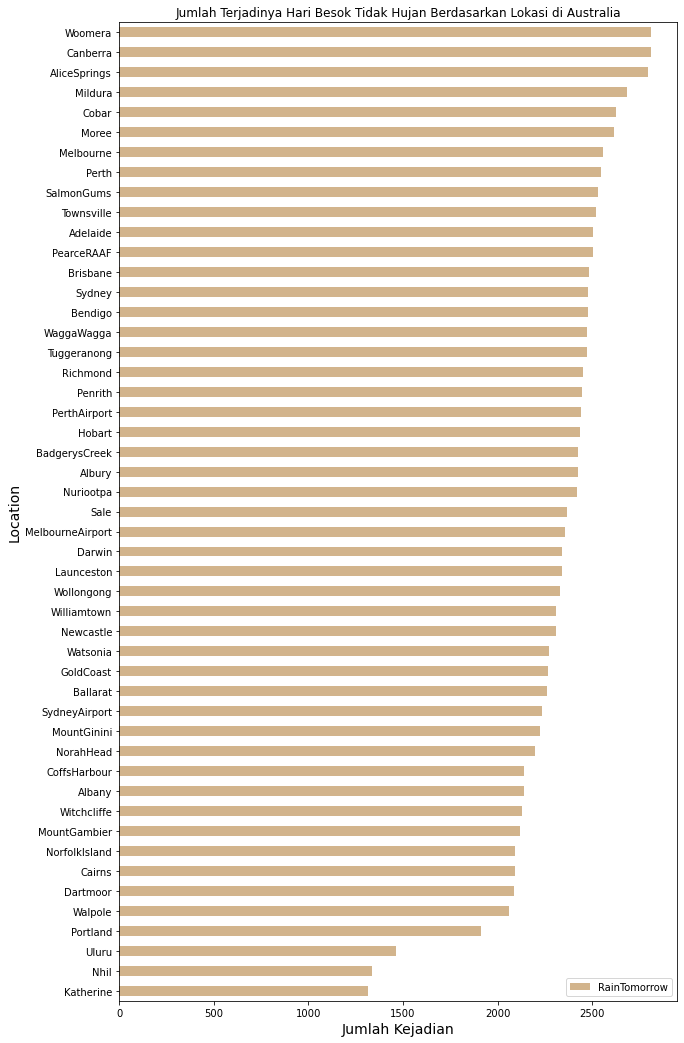

In [45]:
# Kelompokkan data berdasarkan location untuk label 'No'
loc_no = df[
    (df['RainTomorrow']=="No")
].groupby('Location').agg({'RainTomorrow':'count'}).sort_values(by='RainTomorrow')
loc_no.plot(kind='barh', figsize=(10,18), color=['Tan'])

plt.ylabel("Location", fontsize=14)
plt.xlabel("Jumlah Kejadian", fontsize=14)
plt.title("Jumlah Terjadinya Hari Besok Tidak Hujan Berdasarkan Lokasi di Australia")
plt.legend()
plt.show()

**Kesimpulan :** Dari hasil diagram bar chart diatas maka dapat dilihat bahwa untuk location **Canberra, Woomera, AliceSprings, Mildura, dan Cobar** menjadi lima kota dengan data kejadian "Rain Tomorrow" berlabel 'No' tertinggi. Berarti dapat disimpulkan bahwa pada lokasi tersebut jarang terjadi hujan di hari besoknya.

### Visualisasi Korelasi Antar Variabel Untuk Melihat Hubungan

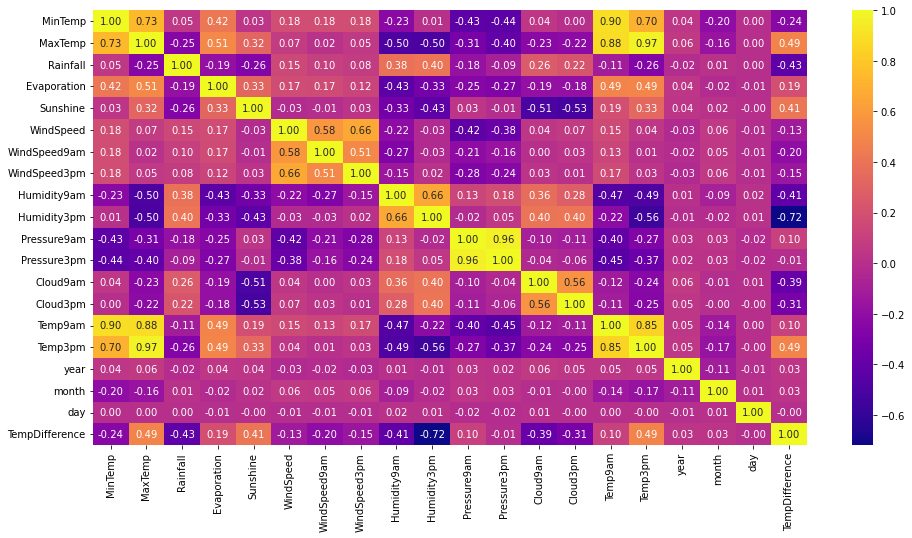

In [46]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), annot=True, cmap='plasma', fmt=".2f")
plt.show()

Dari hasil visualisasi matrix korelasi, maka dapat disimpulkan : <br>
- Atribut Temp9am, Temp3pm, MinTemp, MaxTemp memiliki korelasi searah yang kuat satu sama lain.
- Pressure3pm dan Pressure 9am memiliki korelasi yang sangat kuat.
- Humidity3pm dan TempDifference memiliki hubungan terbalik yang kuat.

# 6. Data Preprocessing

Bagian ini berisi proses penyiapan data untuk proses pelatihan model,
seperti pembagian data menjadi train-dev-test, transformasi data
(normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

### Encode
Encoding fitur kategorik menggunakan replace function pada atribut bertipe Object.

In [47]:
# Extract kolom categorical 
cat_col = df.select_dtypes(object).columns.tolist()
cat_col

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [48]:
# Mengonversi nilai yang dikategorikan menjadi nilai numerik
le = LabelEncoder()
df[cat_col] =df[cat_col].astype('str').apply(le.fit_transform)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 26 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Location        145460 non-null  int32  
 1   MinTemp         145460 non-null  float64
 2   MaxTemp         145460 non-null  float64
 3   Rainfall        145460 non-null  float64
 4   Evaporation     145460 non-null  float64
 5   Sunshine        145460 non-null  float64
 6   WindGustDir     145460 non-null  int32  
 7   WindSpeed       145460 non-null  float64
 8   WindDir9am      145460 non-null  int32  
 9   WindDir3pm      145460 non-null  int32  
 10  WindSpeed9am    145460 non-null  float64
 11  WindSpeed3pm    145460 non-null  float64
 12  Humidity9am     145460 non-null  float64
 13  Humidity3pm     145460 non-null  float64
 14  Pressure9am     145460 non-null  float64
 15  Pressure3pm     145460 non-null  float64
 16  Cloud9am        145460 non-null  float64
 17  Cloud3pm  

In [49]:
# Membagi data fitur dan data target
X = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow'].astype('int64')

print(X.shape)
print(y.shape)

(145460, 25)
(145460,)


In [50]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day,TempDifference
0,2,13.4,22.9,0.6,4.8,8.4,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0,2008,12,1,9.5
1,2,7.4,25.1,0.0,4.8,8.4,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0,2008,12,2,17.7
2,2,12.9,25.7,0.0,4.8,8.4,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0,2008,12,3,12.8
3,2,9.2,28.0,0.0,4.8,8.4,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0,2008,12,4,18.8
4,2,17.5,32.3,1.0,4.8,8.4,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12,5,14.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,41,2.8,23.4,0.0,4.8,8.4,0,31.0,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4,0,0,2017,6,21,20.6
145456,41,3.6,25.3,0.0,4.8,8.4,6,22.0,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5,0,0,2017,6,22,21.7
145457,41,5.4,26.9,0.0,4.8,8.4,3,37.0,9,14,9.0,9.0,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1,0,0,2017,6,23,21.5
145458,41,7.8,27.0,0.0,4.8,8.4,9,28.0,10,3,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0,2017,6,24,19.2


### Features Selection

Bagian ini berisi proses memilih fitur yang paling berpengaruh terhadap model menggunakan Tree-based feature selection dan SelectKBest.

1. Tree-based feature selection

In [51]:
etc_model = ExtraTreesClassifier()
etc_model.fit(X,y)

ExtraTreesClassifier()

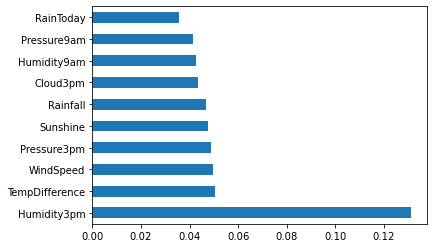

In [52]:
feature_imp = pd.Series(etc_model.feature_importances_,index=X.columns)
feature_imp.nlargest(10).plot(kind='barh');

2. SelectKBest

In [53]:
data = pd.read_csv("weatherAUS.csv")
X = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow'] 

# Apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_classif, k=10)
X_new = bestfeatures.fit_transform(X, y)
names = X.columns.values[bestfeatures.get_support()]
scores = bestfeatures.scores_[bestfeatures.get_support()]
names_scores = list(zip(names, scores))
df_column = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
df_column.sort_values(by=['F_Scores'], ascending=False).reset_index().drop('index', axis=1)

,Feat_names,F_Scores
0,Humidity3pm,33596.712523
1,TempDifference,17665.931049
2,Rainfall,17214.384009
3,Sunshine,16526.346084
4,RainToday,14999.484212
5,Cloud3pm,13417.688111
6,Humidity9am,9879.463487
7,Cloud9am,9227.664971
8,Pressure9am,8090.041912
9,WindSpeed,7276.545193


Setelah diperoleh feature yang paling berpengaruh pada model, dilakukan inisiasi final pada variabel X yang akan dijadikan training.

Dalam hal ini dipilih 10 atribut yang paling berpengaruh signifikan berdasarkan kedua uji feature selection yang telah dilakukan, yaitu atribut Humidity3pm, Sunshine, WindSpeed, Pressure3pm, Rainfall, TempDifference, RainToday, Cloud3pm, Humidity9am, Cloud9am.

In [54]:
X_fit = df[['Humidity3pm','Sunshine', 'WindSpeed','Pressure3pm', 'Rainfall','TempDifference','RainToday', 'Cloud3pm', 'Humidity9am','Cloud9am']]
X_fit.head()

,Humidity3pm,Sunshine,WindSpeed,Pressure3pm,Rainfall,TempDifference,RainToday,Cloud3pm,Humidity9am,Cloud9am
0,22.0,8.4,44.0,1007.1,0.6,9.5,0,5.0,71.0,8.0
1,25.0,8.4,44.0,1007.8,0.0,17.7,0,5.0,44.0,5.0
2,30.0,8.4,46.0,1008.7,0.0,12.8,0,2.0,38.0,5.0
3,16.0,8.4,24.0,1012.8,0.0,18.8,0,5.0,45.0,5.0
4,33.0,8.4,41.0,1006.0,1.0,14.8,0,8.0,82.0,7.0


### Splitting Data

In [55]:
# Melakukan splitting data
X_train, X_test, y_train, y_test = train_test_split(X_fit, y, test_size=0.2,random_state=42, stratify=y)

### Scalling Data

In [56]:
# Scale dan Transform X
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 7. Modelling dan Evaluasi

In [57]:
knn = KNeighborsClassifier()
logreg = LogisticRegression(random_state=0)
dt = tree.DecisionTreeClassifier()
rf = RandomForestClassifier(random_state=0)
nb = GaussianNB()
bst = XGBClassifier()

models = [knn, logreg, dt, rf, nb, bst]
model_names = ['KNN', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'XGBoost']
accuracy = []

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    print(model)
    print(metrics.confusion_matrix(y_test, y_pred))
    print(metrics.classification_report(y_test, y_pred))
    
# Create a dataframe of the model names and their accuracy scores
df_accuracy = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy})
df_accuracy



KNeighborsClassifier()
[[21074  1643]
 [ 3262  3113]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     22717
           1       0.65      0.49      0.56      6375

    accuracy                           0.83     29092
   macro avg       0.76      0.71      0.73     29092
weighted avg       0.82      0.83      0.82     29092

LogisticRegression(random_state=0)
[[21501  1216]
 [ 3326  3049]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.90     22717
           1       0.71      0.48      0.57      6375

    accuracy                           0.84     29092
   macro avg       0.79      0.71      0.74     29092
weighted avg       0.83      0.84      0.83     29092

DecisionTreeClassifier()
[[19344  3373]
 [ 2998  3377]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86     22717
           1       0.50      0.53      0.51      6375

    ac

,Model,Accuracy
0,KNN,0.831397
1,Logistic Regression,0.843875
2,Decision Tree,0.781005
3,Random Forest,0.849203
4,Naive Bayes,0.783342
5,XGBoost,0.848309


Didapatkan 3 model dengan Akurasi terbaik yaitu Random Forest, XGBoost, dan Logistic Regression, setelah itu, kita coba melakukan hyperparameter tuning dengan Random Search.

Sebelum itu, kita coba lakukan percobaan correcting imbalanced dataset.

## Percobaan Correcting Imbalanced Dataset (ADDITION)
***
Pada bagian ini, kami melakukan tambahan percobaan untuk handling imbalanced data menggunakan metode oversampling SMOTE

In [58]:
print("Before oversampling: ",Counter(y))

Before oversampling:  Counter({0: 113583, 1: 31877})


In [59]:
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_fit, y)
print("After oversampling: ",Counter(y_smote))
Xtrain_smote, Xtest_smote, ytrain_smote, ytest_smote = train_test_split(X_smote,y_smote,
                                                                        test_size=0.2, random_state=40 )
mms = MinMaxScaler()
Xtrain_smote = mms.fit_transform(Xtrain_smote)
Xtest_smote = mms.fit_transform(Xtest_smote)

After oversampling:  Counter({0: 113583, 1: 113583})


In [60]:
knn2 = KNeighborsClassifier()
logreg2 = LogisticRegression(random_state=0)
dt2 = tree.DecisionTreeClassifier()
rf2 = RandomForestClassifier(random_state=0)
nb2 = GaussianNB()
bst2 = XGBClassifier()

models2 = [knn2, logreg2, dt2, rf2, nb2, bst2]
model_names = ['KNN', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'XGBoost']
accuracy2 = []
# next
for modell in models2:
    modell.fit(Xtrain_smote, ytrain_smote)
    y_pred2 = modell.predict(Xtest_smote)
    accuracy2.append(accuracy_score(ytest_smote, y_pred2))
    print(modell, "After SMOTE:")    
    print(metrics.confusion_matrix(ytest_smote, y_pred2))
    print(metrics.classification_report(ytest_smote, y_pred2))
    
# Create a dataframe of the model names and their accuracy scores
df_accuracy2 = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy2})
df_accuracy2



KNeighborsClassifier() After SMOTE:
[[16854  5736]
 [ 2880 19964]]
              precision    recall  f1-score   support

           0       0.85      0.75      0.80     22590
           1       0.78      0.87      0.82     22844

    accuracy                           0.81     45434
   macro avg       0.82      0.81      0.81     45434
weighted avg       0.82      0.81      0.81     45434

LogisticRegression(random_state=0) After SMOTE:
[[17566  5024]
 [ 4999 17845]]
              precision    recall  f1-score   support

           0       0.78      0.78      0.78     22590
           1       0.78      0.78      0.78     22844

    accuracy                           0.78     45434
   macro avg       0.78      0.78      0.78     45434
weighted avg       0.78      0.78      0.78     45434

DecisionTreeClassifier() After SMOTE:
[[ 7379 15211]
 [ 2072 20772]]
              precision    recall  f1-score   support

           0       0.78      0.33      0.46     22590
           1       0.5

,Model,Accuracy
0,KNN,0.810362
1,Logistic Regression,0.779394
2,Decision Tree,0.619602
3,Random Forest,0.620548
4,Naive Bayes,0.744949
5,XGBoost,0.530836


Dikarenakan variabel target (RainTomorrow) memiliki perbedaan jumlah data yang cukup besar sehingga mengalami imbalance data, kami melakukan percobaan untuk handling imbalanced data menggunakan metode oversampling SMOTE. Tetapi akurasi serta score yang dihasilkan mengalami penurunan yang lumayan besar, sehingga tidak kami gunakan.

# 8. Hyperparameter Tuning

### Random Forest

In [61]:
# using random search, do tuning for random forest 

rf = RandomForestClassifier(random_state=0)
# Create the parameter grid based on the results of random search
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [62]:
# Instantiate the random search model
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid,
                                n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [63]:
# fit the random search
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': [2, 3],
                                        'min_samples_leaf': [3, 4, 5],
                                        'min_samples_split': [8, 10, 12],
                                        'n_estimators': [100, 200, 300, 1000]},
                   random_state=42, verbose=2)

In [64]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    
    #score accuracy
    accuracy = metrics.accuracy_score(test_labels, predictions) * 100

    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.3f}%.'.format(accuracy))

    #confussion metrics
    print('Confussion Metrics')
    print(metrics.confusion_matrix(test_labels, predictions))
    print('Classification Report')
    print(metrics.classification_report(test_labels, predictions))
    
    return accuracy

In [65]:
rf_random.best_estimator_

RandomForestClassifier(max_depth=80, max_features=2, min_samples_leaf=3,
                       min_samples_split=12, n_estimators=1000, random_state=0)

In [66]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: 0.1479 degrees.
Accuracy = 85.206%.
Confussion Metrics
[[21673  1044]
 [ 3260  3115]]
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     22717
           1       0.75      0.49      0.59      6375

    accuracy                           0.85     29092
   macro avg       0.81      0.72      0.75     29092
weighted avg       0.84      0.85      0.84     29092



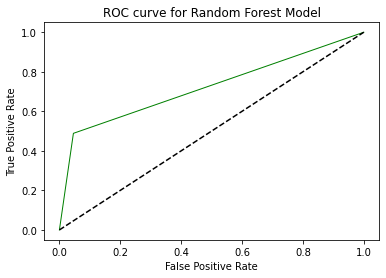

0.7213353392596199


In [67]:
y_pred_rf1 = best_random.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf1)
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Random Forest Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show();

auc_rf = metrics.roc_auc_score(y_test, y_pred_rf1)
print(auc_rf)

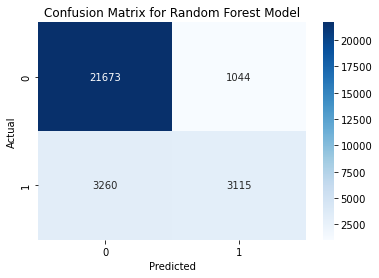

In [87]:
# confussion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf1)

# plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show();

In [89]:
TP = cm_rf[0,0]
TN = cm_rf[1,1]
FP = cm_rf[0,1]
FN = cm_rf[1,0]

# calculate accuracy
accuracy_rf = (TP + TN) / (TP + TN + FP + FN)

# calculate misclassification
misclassification_rf = (FP + FN) / (TP + TN + FP + FN)

# calculate sensitivity / recall
recall_rf = TP / (TP + FN)

# calculate specificity
specificity_rf = TN / (TN + FP)

# calculate precision
precision_rf = TP / (TP + FP)

# calculate f1 score
f1_rf = 2 * (precision_rf * recall_rf) / (precision_rf + recall_rf)

print('Accuracy: ', accuracy_rf)
print('Misclassification: ', misclassification_rf)
print('Sensitivity: ', recall_rf)
print('Specificity: ', specificity_rf)
print('Precision: ', precision_rf)
print('F1 Score: ', f1_rf)


Accuracy:  0.8520555479169531
Misclassification:  0.14794445208304688
Sensitivity:  0.8692495888982473
Specificity:  0.7489781197403222
Precision:  0.9540432275388475
F1 Score:  0.9096747114375656


### XGBoost

In [68]:
# xgboost
bst = XGBClassifier()
# Create the parameter grid based on the results of random search
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'min_child_weight': [1, 2, 3, 4, 5],
    'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.001, 0.005, 0.01, 0.05]
}

In [69]:
bst_random = RandomizedSearchCV(
    estimator = bst, param_distributions = param_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [70]:
# fit random search
bst_random.fit(X_train, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
              

In [71]:
bst_random.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              n_estimators=800, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [72]:
best_random2 = bst_random.best_estimator_
random_accuracy2 = evaluate(best_random2, X_test, y_test)

Model Performance
Average Error: 0.1486 degrees.
Accuracy = 85.140%.
Confussion Metrics
[[21593  1124]
 [ 3199  3176]]
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     22717
           1       0.74      0.50      0.60      6375

    accuracy                           0.85     29092
   macro avg       0.80      0.72      0.75     29092
weighted avg       0.84      0.85      0.84     29092



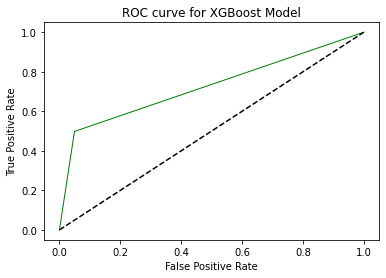

0.7243588571053724


In [73]:
y_pred_xgboost1 = best_random2.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgboost1)
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for XGBoost Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show();

auc_bst = metrics.roc_auc_score(y_test, y_pred_xgboost1)
print(auc_bst)

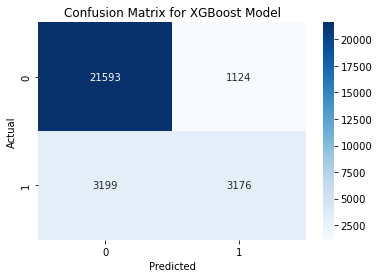

In [90]:
# confussion matrix xgboost
cm_bst = confusion_matrix(y_test, y_pred_xgboost1)

# plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_bst, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for XGBoost Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show();

In [91]:
TP = cm_bst[0,0]
TN = cm_bst[1,1]
FP = cm_bst[0,1]
FN = cm_bst[1,0]

# calculate accuracy
accuracy_bst = (TP + TN) / (TP + TN + FP + FN)

# calculate misclassification
misclassification_bst = (FP + FN) / (TP + TN + FP + FN)

# calculate sensitivity / recall
recall_bst = TP / (TP + FN)

# calculate specificity
specificity_bst = TN / (TN + FP)

# calculate precision
precision_bst = TP / (TP + FP)

# calculate f1 score
f1_bst = 2 * (precision_bst * recall_bst) / (precision_bst + recall_bst)

print('Accuracy: ', accuracy_bst)
print('Misclassification: ', misclassification_bst)
print('Sensitivity: ', recall_bst)
print('Specificity: ', specificity_bst)
print('Precision: ', precision_bst)
print('F1 Score: ', f1_bst)


Accuracy:  0.8514024474082222
Misclassification:  0.14859755259177782
Sensitivity:  0.8709664407873507
Specificity:  0.7386046511627907
Precision:  0.9505216357793723
F1 Score:  0.9090067145172492


### Logistic Regression

In [74]:
# using random search, do tuning for logistic regression 
# Create the parameter grid of logistic regression based on the results of random search
logreg = LogisticRegression(random_state=0)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2']
}

In [75]:
# next
logreg_random = RandomizedSearchCV(
    estimator = logreg, param_distributions = param_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)


In [76]:
# fit random search
logreg_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=LogisticRegression(random_state=0),
                   n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'penalty': ['l1', 'l2']},
                   random_state=42, verbose=2)

In [77]:
logreg_random.best_estimator_

LogisticRegression(C=1000, random_state=0)

In [78]:
best_random3 = logreg_random.best_estimator_
random_accuracy3 = evaluate(best_random3, X_test, y_test)

Model Performance
Average Error: 0.1560 degrees.
Accuracy = 84.398%.
Confussion Metrics
[[21501  1216]
 [ 3323  3052]]
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.95      0.90     22717
           1       0.72      0.48      0.57      6375

    accuracy                           0.84     29092
   macro avg       0.79      0.71      0.74     29092
weighted avg       0.83      0.84      0.83     29092



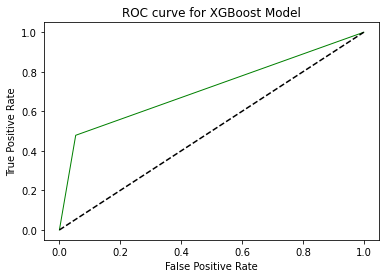

0.7126084516475957


In [79]:
y_pred_logreg1 = best_random3.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg1)
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for XGBoost Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show();

auc_logreg = metrics.roc_auc_score(y_test, y_pred_logreg1)
print(auc_logreg)

Setelah dilakukan tuning di 3 model, diperoleh Random Forest memiliki akurasi tertinggi di antara yang lain dengan akurasi 85,206 %.
Model inilah yang nantinya disimpan dan dijadikan model predict untuk data baru berikutnya.

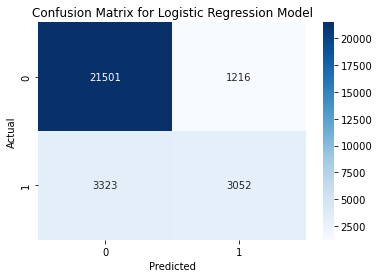

In [92]:
# logreg
cm_logreg = confusion_matrix(y_test, y_pred_logreg1)

# plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show();

In [93]:

TP = cm_logreg[0,0]
TN = cm_logreg[1,1]
FP = cm_logreg[0,1]
FN = cm_logreg[1,0]

# calculate accuracy
accuracy_logreg = (TP + TN) / (TP + TN + FP + FN)

# calculate misclassification
misclassification_logreg = (FP + FN) / (TP + TN + FP + FN)

# calculate sensitivity / recall
recall_logreg = TP / (TP + FN)

# calculate specificity
specificity_logreg = TN / (TN + FP)

# calculate precision
precision_logreg = TP / (TP + FP)

# calculate f1 score
f1_logreg = 2 * (precision_logreg * recall_logreg) / (precision_logreg + recall_logreg)

print('Accuracy: ', accuracy_logreg)
print('Misclassification: ', misclassification_logreg)
print('Sensitivity: ', recall_logreg)
print('Specificity: ', specificity_logreg)
print('Precision: ', precision_logreg)
print('F1 Score: ', f1_logreg)




Accuracy:  0.8439777258352812
Misclassification:  0.1560222741647188
Sensitivity:  0.8661376087657106
Specificity:  0.7150890346766635
Precision:  0.9464718052559757
F1 Score:  0.9045245156812014


# 9. Saving Model

In [83]:
# save rf_random
filename = 'rf_random.pkl'
pickle.dump(rf_random, open(filename, 'wb'))

# 10. Model Inference

In [84]:
# load rf_random
rf_model = pickle.load(open('rf_random.pkl', 'rb'))

In [85]:
# Input from user
humidity3pm = float(input("Humidity 3 pm: "))
humidity9am = float(input("Humidity 9 am: "))

cloud3pm = float(input("Cloud 3 pm: "))
cloud9am = float(input("Cloud 9 am: "))

pressure3pm = float(input("Pressure 3 pm: "))

sunshine = float(input("Sunshine: "))
rainfall = float(input("Rainfall: "))

windSpeed = float(input("Wind Speed: "))

tempDifference = float(input("Temp Difference: "))
rainToday = float(input("Rain Today: "))

input_data = [[humidity3pm, sunshine, windSpeed, pressure3pm, rainfall, tempDifference, rainToday, cloud3pm, humidity9am, cloud9am]]

# predict
y_output = rf_model.predict(input_data)

if y_output == 0:
    print('Besok Tidak Hujan')
else:
    print('Besok Hujan')

Besok Hujan


## 11. Kesimpulan
***
Dari analisis yang telah kami lakukan, maka dapat diperoleh kesimpulan sebagai berikut:
- Terdapat 22 atribut yang diasumsikan memengaruhi Hari besok Hujan, kami mengambil 10 fitur yang paling berpengaruh dalam model.
- Untuk mengatasi missing value pada analisis ini, kami menggunakan pengisian missing value dengan menggunakan median untuk kolom/fitur bertipe numerical dan modus untuk kolom/fitur bertipe categorical.
- Pada project ini kami mencoba untuk menggunakan beberapa model seperti KNN, Logistic regression, Decision Tree, Random Forest, Naive Bayes, dan XGBoost.
- Model Support Vector Machine tidak kami masukkan, karena waktu fitting nya yang terlalu lama dan hasil yang tidak memuaskan.
- Pada analisis ini kami juga membuat beberapa visualisasi menggunakan lineplot, boxplot, histogram, pie chart, dan matriks korelasi (heatmap) dan juga melakukan beberapa contoh groupby dan query terhadap data yang ada
- Pada modelling, kami mencoba melakukan fitting pada semua model dengan parameter default. Diperoleh 3 metode teratas dengan akurasi tertinggi yakni Random Forest, XGBoost, dan Logistic Regression.
- Setelah dilakukan evaluasi model, kami mencoba untuk melakukan hyper-parameter tunning model Random Forest, XGBoost, dan Logistic Regression. Didapatkan peningkatan akurasi dari masing-masing model, dengan urutan: Random Forest: 85,206%, XGBoost: 85.140%, Logistic Regression: 84.398%
- Jika dilihat berdasarkan F1 Score, dapat dilihat bahwa Random Forest masih yang terbaik dengan F1 Score = 0.9096 
- Dari evaluasi model, dapat diketahui bahwa nilai precision lebih besar daripada recall. Hal ini berarti *False Positif bernilai kecil*.
- Karena pada target tidak seimbang, maka evaluasi model yang digunakan adalah F1 Score dan model yang dipilih adalah *Random Forest*.